In [75]:
# Import necessary libraries
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
#importing the csv file
import pandas as pd
dataset=pd.read_csv('Data Sheet - Sheet1.csv')


In [4]:
dataset.head()

,Crash_Severity,Vehicle_Speed,Crash_Time,Age,Gender,Vehicle_Type,Number_of_Lanes,Lane_Width,Road_Type,Alcohol_Consumption,Crash_Type,Seatbelt_Usage,Speed_Limit,Road_Surface_Condition
0,Minor injury,107,11,27,Male,Heavy Vehicle,2,3.484386,Urban,Yes,Rear-end,No,30,Icy
1,Minor injury,27,16,39,Male,Car,2,3.293091,Rural,Yes,Rear-end,Yes,110,Dry
2,Minor injury,87,14,42,Female,Car,3,3.218911,Urban,No,Rear-end,No,59,Dry
3,Minor injury,43,3,60,Female,Heavy Vehicle,2,3.113012,Rural,No,Rear-end,No,73,Wet
4,Minor injury,72,8,70,Male,T.W,3,3.106580,Urban,Yes,Rear-end,Yes,42,Wet


In [5]:
#predicting the column names and no of columns
print(dataset.columns)


Index(['Crash_Severity', 'Vehicle_Speed', 'Crash_Time', 'Age', 'Gender',
       'Vehicle_Type', 'Number_of_Lanes', 'Lane_Width', 'Road_Type',
       'Alcohol_Consumption', 'Crash_Type', 'Seatbelt_Usage', 'Speed_Limit',
       'Road_Surface_Condition'],
      dtype='object')


**Output Label**

In [6]:
print(dataset['Crash_Severity'].unique())
print(dataset['Crash_Severity'].nunique())


['Minor injury' 'Major injury' 'Fatal crash']
3


In [7]:
print(dataset['Vehicle_Speed'].unique())
print(dataset['Vehicle_Speed'].nunique())
print(dataset.corr(numeric_only=True)['Vehicle_Speed'])

[107  27  87  43  72  15  62  96  85 120  76  37  13  50  98  44  35  40
  30 105  49  70  60  82  88  57  75  25 104  20  90 106 109 113  94  38
  84  56  41  99  39  89  10  83  59  92  48  52 100  95  28  14  24  21
  42  93  23  33  81  31  32  45  22  55  34 116  18 114 118  26  36 108
 102  78 103 112  68 110  67  47 115  53  46 117  74  79  19  80  71  58
  54  17  65  61  64  97  69 119 111  77  12  51  91  29  66]
105
Vehicle_Speed      1.000000
Crash_Time        -0.022966
Age               -0.028394
Number_of_Lanes   -0.084017
Lane_Width         0.086389
Speed_Limit        0.062652
Name: Vehicle_Speed, dtype: float64


In [8]:
print(dataset['Crash_Time'].unique())
print(dataset['Crash_Time'].nunique())
print(dataset.corr(numeric_only=True)['Crash_Time'])

[11 16 14  3  8 20  6 17 21 22 15  5  2  1 13 19 23 10  7 18 12  0  4  9]
24
Vehicle_Speed     -0.022966
Crash_Time         1.000000
Age                0.030411
Number_of_Lanes    0.038446
Lane_Width         0.015068
Speed_Limit       -0.051536
Name: Crash_Time, dtype: float64


In [9]:
print(dataset['Age'].unique())
print(dataset['Age'].nunique())
print(dataset.corr(numeric_only=True)['Age'])

[27 39 42 60 70 49 69 40 18 43 38 36 31 80 56 26 72 25 37 68 41 63 32 44
 58 62 61 78 48 28 22 34 33 77 47 55 53 46 74 19 73 20 65 75 54 67 50 24
 52 23 66 35 79 45 30 57 51 21 59 71 29 64]
62
Vehicle_Speed     -0.028394
Crash_Time         0.030411
Age                1.000000
Number_of_Lanes    0.019111
Lane_Width         0.034015
Speed_Limit        0.115332
Name: Age, dtype: float64


In [10]:
print(dataset['Gender'].unique())
print(dataset['Gender'].nunique())

['Male' 'Female']
2


In [11]:
print(dataset['Vehicle_Type'].unique())
print(dataset['Vehicle_Type'].nunique())

['Heavy Vehicle' 'Car' 'T.W']
3


In [12]:
print(dataset['Number_of_Lanes'].unique())
print(dataset['Number_of_Lanes'].nunique())
print(dataset.corr(numeric_only=True)['Number_of_Lanes'])

[2 3 1]
3
Vehicle_Speed     -0.084017
Crash_Time         0.038446
Age                0.019111
Number_of_Lanes    1.000000
Lane_Width        -0.025460
Speed_Limit       -0.076283
Name: Number_of_Lanes, dtype: float64


In [13]:
print(dataset['Lane_Width'].unique())
print(dataset['Lane_Width'].nunique())
print(dataset.corr(numeric_only=True)['Lane_Width'])

[3.484386 3.293091 3.218911 3.113012 3.10658  3.38743  3.46411  3.199897
 3.333741 3.113678 3.296583 3.388057 3.260688 3.095538 3.206009 3.150078
 3.099321 3.317755 3.001781 3.457397 3.319937 3.309784 3.436201 3.147718
 3.443541 3.384257 3.232115 3.454554 3.456898 3.278513 3.356214 3.181641
 3.490071 3.031512 3.026725 3.365295 3.09371  3.193266 3.391984 3.072395
 3.176051 3.175086 3.048192 3.289469 3.484957 3.447539 3.116892 3.387385
 3.46606  3.46974  3.29879  3.392226 3.232979 3.2283   3.390458 3.387994
 3.173093 3.250121 3.210584 3.105862 3.321446 3.290418 3.424379 3.475189
 3.094642 3.044026 3.250255 3.038184 3.125095 3.454076 3.12094  3.260175
 3.159393 3.444472 3.13929  3.247267 3.2851   3.20436  3.026571 3.197868
 3.155439 3.442724 3.333953 3.271458 3.152788 3.057697 3.34537  3.207594
 3.077657 3.311241 3.024163 3.440439 3.416046 3.142872 3.30849  3.4955
 3.452586 3.432739 3.102667 3.320323 3.22776  3.358975 3.461152 3.453363
 3.106514 3.497986 3.137761 3.035862 3.347497 3.29131

In [14]:
print(dataset['Road_Type'].unique())
print(dataset['Road_Type'].nunique())

['Urban' 'Rural']
2


In [15]:
print(dataset['Alcohol_Consumption'].unique())
print(dataset['Alcohol_Consumption'].nunique())


['Yes' 'No']
2


In [16]:
print(dataset['Crash_Type'].unique())
print(dataset['Crash_Type'].nunique())

['Rear-end' 'Head-on']
2


In [17]:
print(dataset['Seatbelt_Usage'].unique())
print(dataset['Seatbelt_Usage'].nunique())

['No' 'Yes']
2


In [18]:
print(dataset['Speed_Limit'].unique())
print(dataset['Speed_Limit'].nunique())
print(dataset.corr(numeric_only=True)['Speed_Limit'])

[ 30 110  59  73  42 117  55  97 100  44 104  36  81  89 111  64 109 116
  51  49  34  82  32 102  90  62 106 120  63  37  78  74  96  72  57  61
  92  69  33 118  43  50  40  56  83 107 114  48  54 112  99  75  79  67
  66  71  45 113  58 108  84  77  87  91  31  65  38  47  94  98  53  76
  88  85 101  93  39 105  52  80  68  70  46 103 119]
85
Vehicle_Speed      0.062652
Crash_Time        -0.051536
Age                0.115332
Number_of_Lanes   -0.076283
Lane_Width        -0.014883
Speed_Limit        1.000000
Name: Speed_Limit, dtype: float64


In [19]:
print(dataset['Road_Surface_Condition'].unique())
print(dataset['Road_Surface_Condition'].nunique())

['Icy' 'Dry' 'Wet']
3


Summary:- The numerical columns are almost independent of each other

<h1>EDA START</h1>

**Univariate Analysis for the categorical features**

1.   **Vehicle_Speed (Numerical)**
2.   **Crash_Time (Numerical)**
3.   **Age (Numerical)**
4.   Gender
5.   Vehicle Type
6.   Number_of_Lanes
7.   **Lane_Width (Numerical)**
8.   Road_Type
9.   Alcohol Consumption
10.  Crash_Type
11.  Seatbelt_Usage
12.  **Speed_Limit (Numerical)**
13.  Road_Surface_Condition



In [20]:
dataset.columns

Index(['Crash_Severity', 'Vehicle_Speed', 'Crash_Time', 'Age', 'Gender',
       'Vehicle_Type', 'Number_of_Lanes', 'Lane_Width', 'Road_Type',
       'Alcohol_Consumption', 'Crash_Type', 'Seatbelt_Usage', 'Speed_Limit',
       'Road_Surface_Condition'],
      dtype='object')

In [21]:
#importing sns
import seaborn as sns

<Axes: xlabel='count', ylabel='Crash_Severity'>

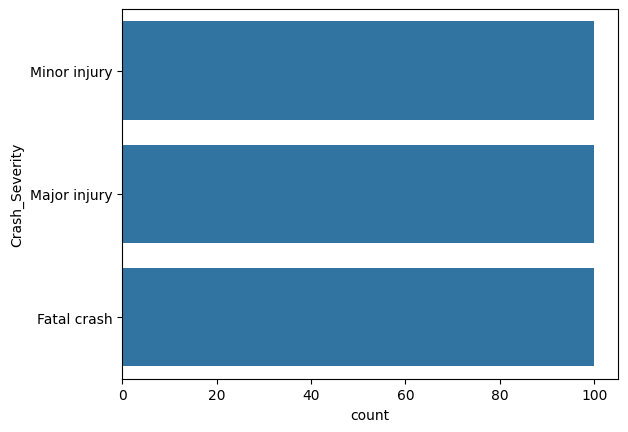

In [22]:
sns.countplot(dataset['Crash_Severity'])

<Axes: xlabel='Crash_Severity', ylabel='Vehicle_Speed'>

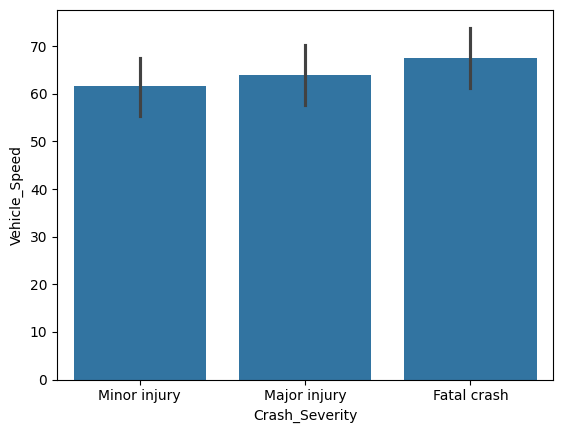

In [23]:
sns.barplot(x='Crash_Severity', y='Vehicle_Speed', data=dataset)

<Axes: xlabel='Crash_Severity', ylabel='Crash_Time'>

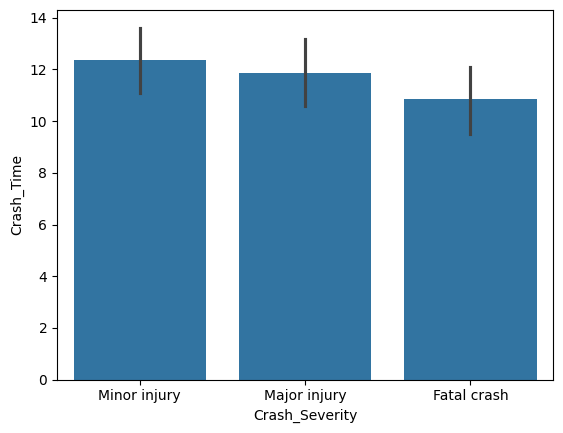

In [24]:
sns.barplot(x='Crash_Severity', y='Crash_Time', data=dataset)

<Axes: xlabel='Crash_Severity', ylabel='Age'>

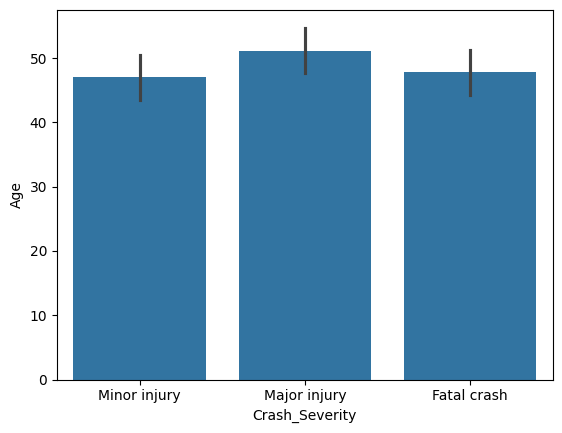

In [25]:
sns.barplot(x='Crash_Severity', y='Age', data=dataset)

<Axes: xlabel='Crash_Severity', ylabel='Lane_Width'>

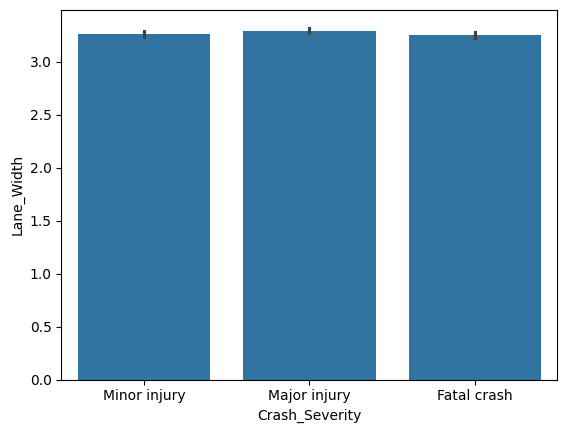

In [26]:
sns.barplot(x='Crash_Severity', y='Lane_Width', data=dataset)

<Axes: xlabel='Crash_Severity', ylabel='Speed_Limit'>

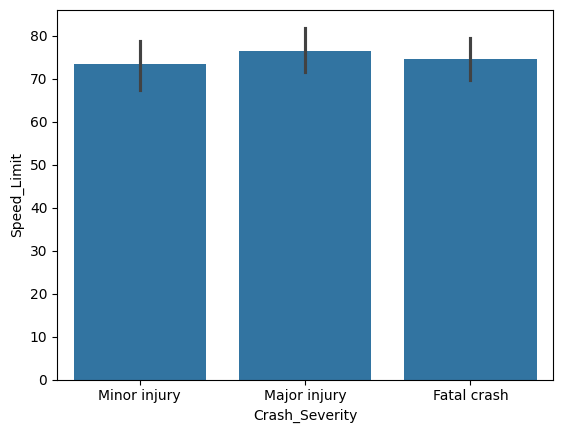

In [27]:
sns.barplot(x='Crash_Severity', y='Speed_Limit', data=dataset)

**Dist Plots**

C:\Users\sneha\AppData\Local\Temp\ipykernel_21188\2813556010.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['Crash_Severity']=='Minor injury']['Vehicle_Speed'],hist=False)
C:\Users\sneha\AppData\Local\Temp\ipykernel_21188\2813556010.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637

<Axes: xlabel='Vehicle_Speed', ylabel='Density'>

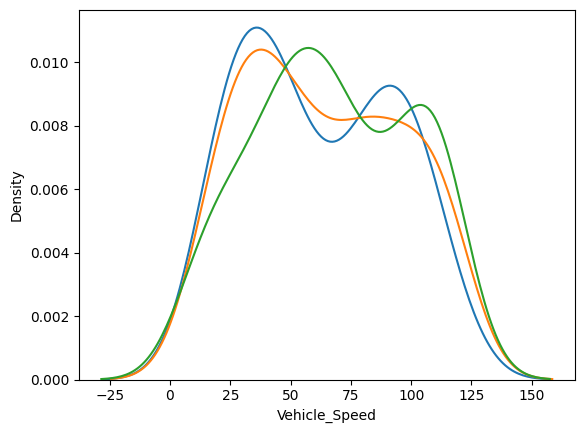

In [28]:
sns.distplot(dataset[dataset['Crash_Severity']=='Minor injury']['Vehicle_Speed'],hist=False)
sns.distplot(dataset[dataset['Crash_Severity']=='Major injury']['Vehicle_Speed'],hist=False)
sns.distplot(dataset[dataset['Crash_Severity']=='Fatal crash']['Vehicle_Speed'],hist=False)

C:\Users\sneha\AppData\Local\Temp\ipykernel_21188\1998832823.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['Crash_Severity']=='Minor injury']['Crash_Time'],hist=False)
C:\Users\sneha\AppData\Local\Temp\ipykernel_21188\1998832823.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637275

<Axes: xlabel='Crash_Time', ylabel='Density'>

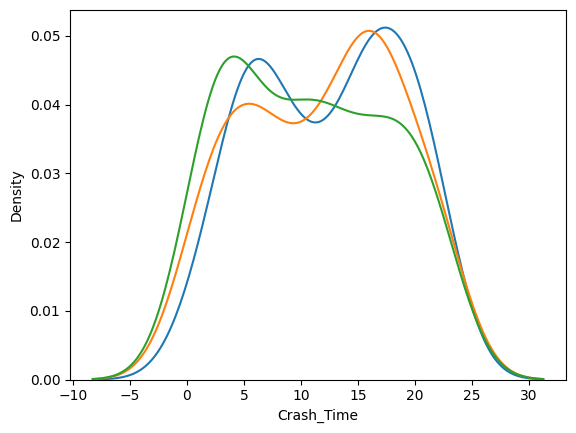

In [29]:
sns.distplot(dataset[dataset['Crash_Severity']=='Minor injury']['Crash_Time'],hist=False)
sns.distplot(dataset[dataset['Crash_Severity']=='Major injury']['Crash_Time'],hist=False)
sns.distplot(dataset[dataset['Crash_Severity']=='Fatal crash']['Crash_Time'],hist=False)

C:\Users\sneha\AppData\Local\Temp\ipykernel_21188\966798533.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['Crash_Severity']=='Minor injury']['Age'],hist=False)
C:\Users\sneha\AppData\Local\Temp\ipykernel_21188\966798533.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<Axes: xlabel='Age', ylabel='Density'>

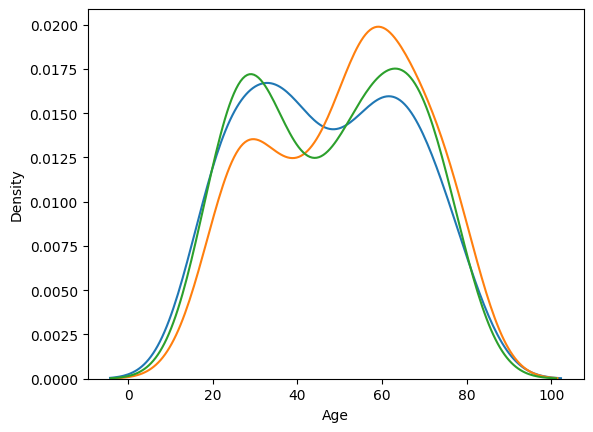

In [30]:
sns.distplot(dataset[dataset['Crash_Severity']=='Minor injury']['Age'],hist=False)
sns.distplot(dataset[dataset['Crash_Severity']=='Major injury']['Age'],hist=False)
sns.distplot(dataset[dataset['Crash_Severity']=='Fatal crash']['Age'],hist=False)

C:\Users\sneha\AppData\Local\Temp\ipykernel_21188\3400779834.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['Crash_Severity']=='Minor injury']['Lane_Width'],hist=False)
C:\Users\sneha\AppData\Local\Temp\ipykernel_21188\3400779834.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637275

<Axes: xlabel='Lane_Width', ylabel='Density'>

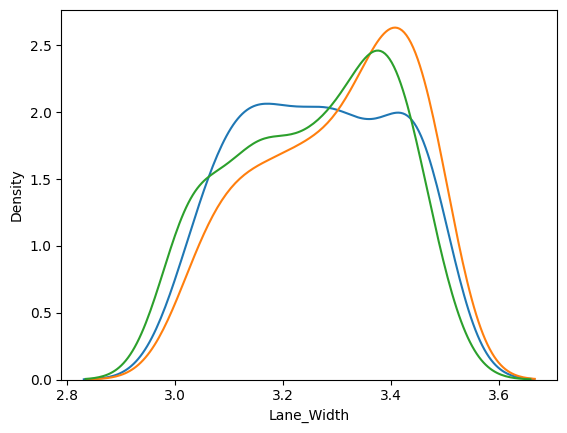

In [31]:
sns.distplot(dataset[dataset['Crash_Severity']=='Minor injury']['Lane_Width'],hist=False)
sns.distplot(dataset[dataset['Crash_Severity']=='Major injury']['Lane_Width'],hist=False)
sns.distplot(dataset[dataset['Crash_Severity']=='Fatal crash']['Lane_Width'],hist=False)

C:\Users\sneha\AppData\Local\Temp\ipykernel_21188\3537324657.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['Crash_Severity']=='Minor injury']['Speed_Limit'],hist=False)
C:\Users\sneha\AppData\Local\Temp\ipykernel_21188\3537324657.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63727

<Axes: xlabel='Speed_Limit', ylabel='Density'>

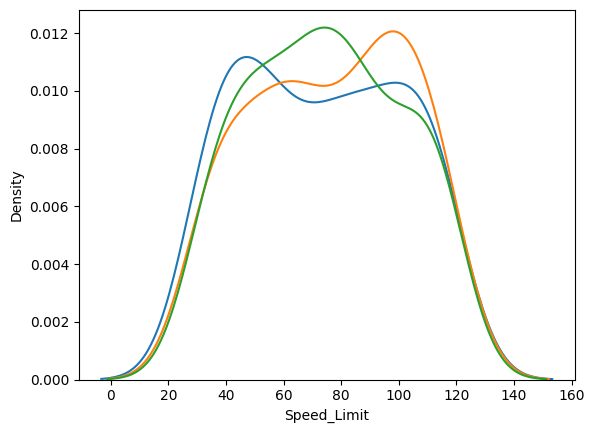

In [32]:
sns.distplot(dataset[dataset['Crash_Severity']=='Minor injury']['Speed_Limit'],hist=False)
sns.distplot(dataset[dataset['Crash_Severity']=='Major injury']['Speed_Limit'],hist=False)
sns.distplot(dataset[dataset['Crash_Severity']=='Fatal crash']['Speed_Limit'],hist=False)

<h1>The above plot indicates a bimodal nature of the  distribution of numericals are bimodal.

<Axes: xlabel='Gender', ylabel='Crash_Severity'>

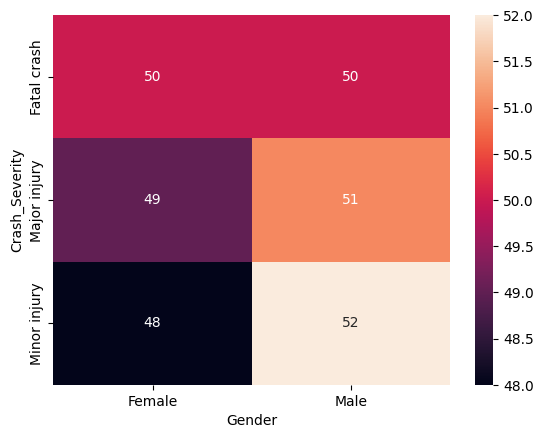

In [33]:
#heatmaps for categorical-categorical
sns.heatmap(pd.crosstab(dataset['Crash_Severity'],dataset['Gender']),annot=True)

<Axes: xlabel='Vehicle_Type', ylabel='Crash_Severity'>

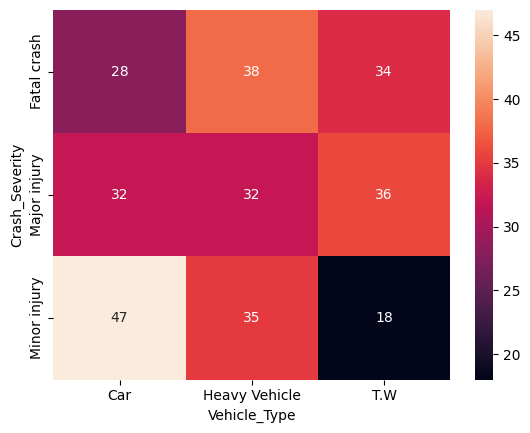

In [34]:
sns.heatmap(pd.crosstab(dataset['Crash_Severity'],dataset['Vehicle_Type']),annot=True)

<Axes: xlabel='Number_of_Lanes', ylabel='Crash_Severity'>

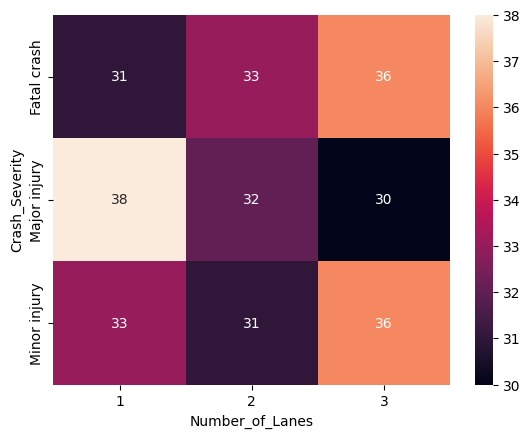

In [35]:
sns.heatmap(pd.crosstab(dataset['Crash_Severity'],dataset['Number_of_Lanes']),annot=True)

<Axes: xlabel='Road_Type', ylabel='Crash_Severity'>

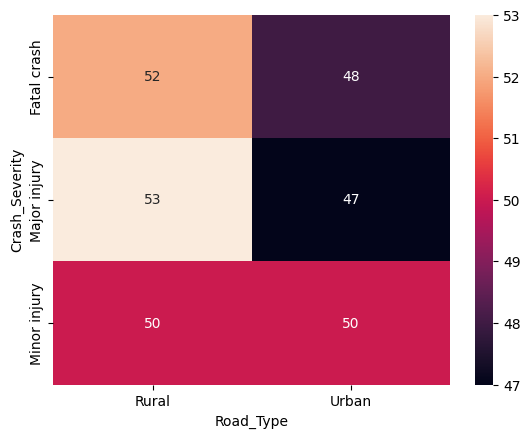

In [36]:
sns.heatmap(pd.crosstab(dataset['Crash_Severity'],dataset['Road_Type']),annot=True)

<Axes: xlabel='Alcohol_Consumption', ylabel='Crash_Severity'>

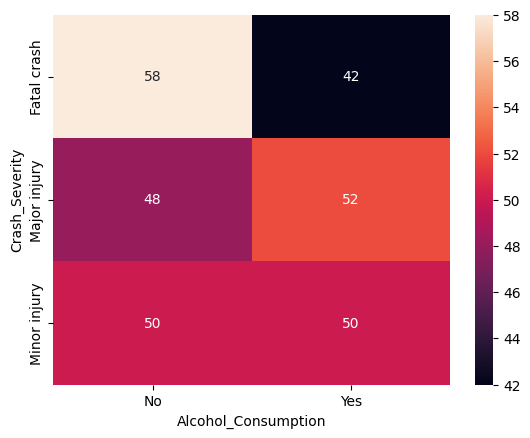

In [37]:
sns.heatmap(pd.crosstab(dataset['Crash_Severity'],dataset['Alcohol_Consumption']),annot=True)


<Axes: xlabel='Crash_Type', ylabel='Crash_Severity'>

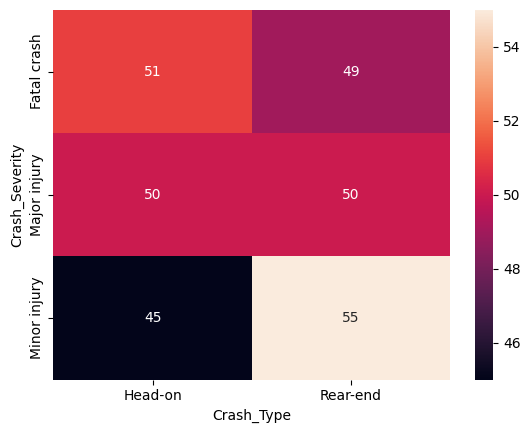

In [38]:
sns.heatmap(pd.crosstab(dataset['Crash_Severity'],dataset['Crash_Type']),annot=True)

<Axes: xlabel='Seatbelt_Usage', ylabel='Crash_Severity'>

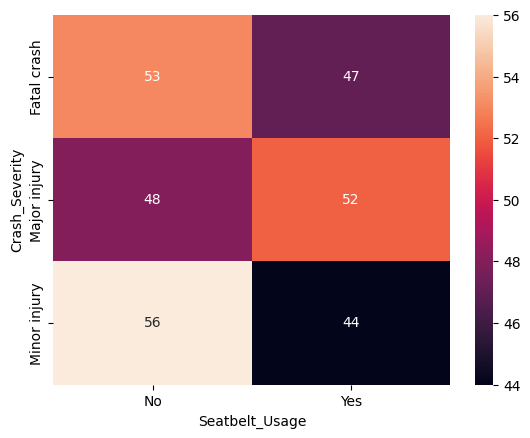

In [39]:
sns.heatmap(pd.crosstab(dataset['Crash_Severity'],dataset['Seatbelt_Usage']),annot=True)

<Axes: xlabel='Road_Surface_Condition', ylabel='Crash_Severity'>

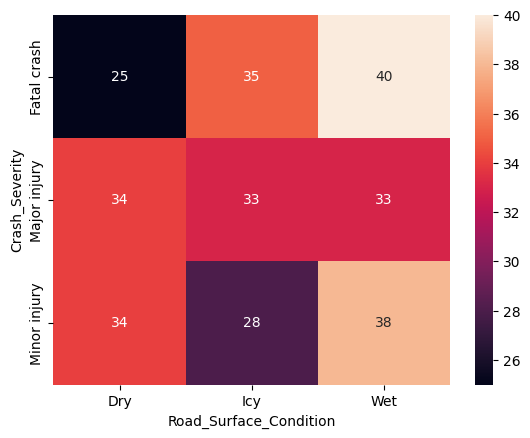

In [40]:
sns.heatmap(pd.crosstab(dataset['Crash_Severity'],dataset['Road_Surface_Condition']),annot=True)

<h1>Conversion of categorical to numerics



1. Vehicle_Speed (Numerical)
2. Crash_Time (Numerical)
3. Age (Numerical)
4. Gender
5. Vehicle Type
6. Number_of_Lanes
7. Lane_Width (Numerical)
8. Road_Type
9. Alcohol Consumption
10. Crash_Type
11. Seatbelt_Usage
12. Speed_Limit (Numerical)
13. Road_Surface_Condition

One-Hot: 'Gender','Vehicle_Type','Number_of_Lanes','Road_Type','Alcohol Consumption','Crash_Type','Seatbelt_Usage','Road_Surface_Condition'
<br>
For rest its binary one or zero

In [41]:
#onehotencoding
dataframe1=pd.get_dummies(dataset,columns=['Gender'],drop_first=True)

In [42]:
df=pd.get_dummies(dataset,columns=['Gender','Vehicle_Type','Number_of_Lanes','Road_Type','Alcohol_Consumption','Crash_Type','Seatbelt_Usage','Road_Surface_Condition'],drop_first=True)

In [43]:
df.head()

,Crash_Severity,Vehicle_Speed,Crash_Time,Age,Lane_Width,Speed_Limit,Gender_Male,Vehicle_Type_Heavy Vehicle,Vehicle_Type_T.W,Number_of_Lanes_2,Number_of_Lanes_3,Road_Type_Urban,Alcohol_Consumption_Yes,Crash_Type_Rear-end,Seatbelt_Usage_Yes,Road_Surface_Condition_Icy,Road_Surface_Condition_Wet
0,Minor injury,107,11,27,3.484386,30,True,True,False,True,False,True,True,True,False,True,False
1,Minor injury,27,16,39,3.293091,110,True,False,False,True,False,False,True,True,True,False,False
2,Minor injury,87,14,42,3.218911,59,False,False,False,False,True,True,False,True,False,False,False
3,Minor injury,43,3,60,3.113012,73,False,True,False,True,False,False,False,True,False,False,True
4,Minor injury,72,8,70,3.106580,42,True,False,True,False,True,True,True,True,True,False,True


In [44]:
#finding correlations now
df.corr(numeric_only=True)

,Vehicle_Speed,Crash_Time,Age,Lane_Width,Speed_Limit,Gender_Male,Vehicle_Type_Heavy Vehicle,Vehicle_Type_T.W,Number_of_Lanes_2,Number_of_Lanes_3,Road_Type_Urban,Alcohol_Consumption_Yes,Crash_Type_Rear-end,Seatbelt_Usage_Yes,Road_Surface_Condition_Icy,Road_Surface_Condition_Wet
Vehicle_Speed,1.000000,-0.022966,-0.028394,0.086389,0.062652,-0.099104,0.108995,-0.045506,-0.047984,-0.049501,0.015858,0.019285,0.085621,-0.038378,0.016532,0.015865
Crash_Time,-0.022966,1.000000,0.030411,0.015068,-0.051536,-0.047138,0.027574,-0.027984,0.045408,0.011105,0.084209,0.072024,-0.091437,-0.036369,0.079389,-0.072426
Age,-0.028394,0.030411,1.000000,0.034015,0.115332,0.044756,0.033934,0.045209,0.108856,-0.036963,-0.076190,-0.025207,-0.116755,-0.007202,-0.015797,0.039910
Lane_Width,0.086389,0.015068,0.034015,1.000000,-0.014883,0.063462,-0.007955,-0.018042,-0.051262,0.003080,0.040771,-0.055143,-0.073476,-0.068805,0.002100,-0.082913
Speed_Limit,0.062652,-0.051536,0.115332,-0.014883,1.000000,-0.000060,-0.049365,-0.067363,-0.011641,-0.060664,0.030035,-0.011825,0.010201,0.039881,-0.000981,-0.112750
Gender_Male,-0.099104,-0.047138,0.044756,0.063462,-0.000060,1.000000,-0.021669,0.045694,0.100633,-0.070662,-0.119424,0.087554,-0.047226,0.054337,0.057749,-0.091291
Vehicle_Type_Heavy Vehicle,0.108995,0.027574,0.033934,-0.007955,-0.049365,-0.021669,1.000000,-0.472771,-0.038952,0.048684,0.017481,0.022381,0.029362,-0.112639,0.050937,0.002171
Vehicle_Type_T.W,-0.045506,-0.027984,0.045209,-0.018042,-0.067363,0.045694,-0.472771,1.000000,0.107354,-0.091496,-0.007814,-0.047480,-0.163666,0.074075,-0.065291,0.021836
Number_of_Lanes_2,-0.047984,0.045408,0.108856,-0.051262,-0.011641,0.100633,-0.038952,0.107354,1.000000,-0.492366,0.051478,0.027462,-0.132673,0.032048,0.034926,0.007104
Number_of_Lanes_3,-0.049501,0.011105,-0.036963,0.003080,-0.060664,-0.070662,0.048684,-0.091496,-0.492366,1.000000,-0.018306,-0.055775,0.009010,-0.051001,-0.039824,0.003789


In [45]:
#finding a correlation between one column and other columns
df.corr(numeric_only=True)['Vehicle_Speed']


Vehicle_Speed                 1.000000
Crash_Time                   -0.022966
Age                          -0.028394
Lane_Width                    0.086389
Speed_Limit                   0.062652
Gender_Male                  -0.099104
Vehicle_Type_Heavy Vehicle    0.108995
Vehicle_Type_T.W             -0.045506
Number_of_Lanes_2            -0.047984
Number_of_Lanes_3            -0.049501
Road_Type_Urban               0.015858
Alcohol_Consumption_Yes       0.019285
Crash_Type_Rear-end           0.085621
Seatbelt_Usage_Yes           -0.038378
Road_Surface_Condition_Icy    0.016532
Road_Surface_Condition_Wet    0.015865
Name: Vehicle_Speed, dtype: float64

In [46]:
df.corr(numeric_only=True)['Crash_Time']

Vehicle_Speed                -0.022966
Crash_Time                    1.000000
Age                           0.030411
Lane_Width                    0.015068
Speed_Limit                  -0.051536
Gender_Male                  -0.047138
Vehicle_Type_Heavy Vehicle    0.027574
Vehicle_Type_T.W             -0.027984
Number_of_Lanes_2             0.045408
Number_of_Lanes_3             0.011105
Road_Type_Urban               0.084209
Alcohol_Consumption_Yes       0.072024
Crash_Type_Rear-end          -0.091437
Seatbelt_Usage_Yes           -0.036369
Road_Surface_Condition_Icy    0.079389
Road_Surface_Condition_Wet   -0.072426
Name: Crash_Time, dtype: float64

In [47]:
df.describe()


,Vehicle_Speed,Crash_Time,Age,Lane_Width,Speed_Limit
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,64.366667,11.690000,48.663333,3.272374,74.746667
std,31.951974,6.740327,18.432104,0.143053,26.857903
min,10.000000,0.000000,18.000000,3.001781,30.000000
25%,37.000000,5.750000,31.000000,3.150568,51.000000
50%,60.500000,12.000000,51.000000,3.285620,75.000000
75%,94.000000,17.000000,65.000000,3.394545,97.250000
max,120.000000,23.000000,80.000000,3.497986,120.000000



Logistic Regression Results:
Accuracy: 0.35
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.36      0.40        22
           1       0.24      0.38      0.29        16
           2       0.41      0.32      0.36        22

    accuracy                           0.35        60
   macro avg       0.37      0.35      0.35        60
weighted avg       0.38      0.35      0.36        60

Confusion Matrix:


C:\Users\sneha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


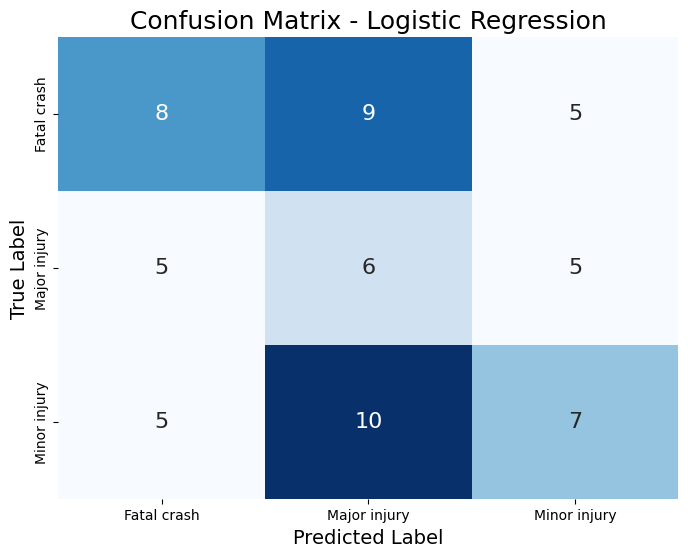


Random Forest Results:
Accuracy: 0.22
Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.32      0.34        22
           1       0.08      0.12      0.10        16
           2       0.24      0.18      0.21        22

    accuracy                           0.22        60
   macro avg       0.23      0.21      0.22        60
weighted avg       0.24      0.22      0.23        60

Confusion Matrix:


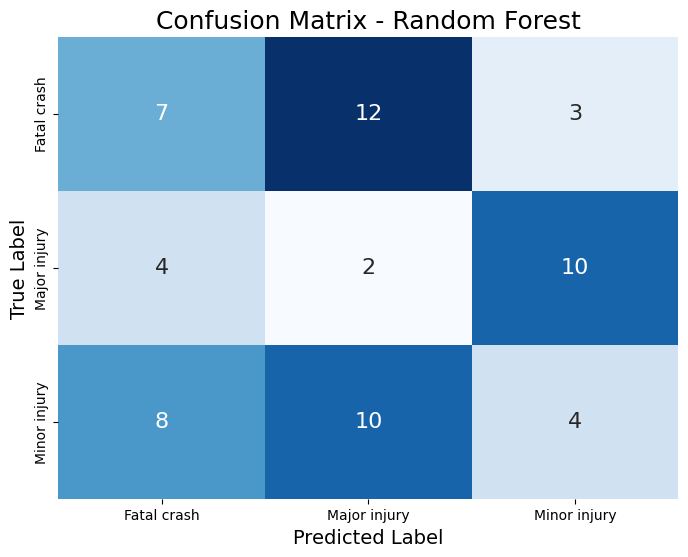


Gradient Boosting Results:
Accuracy: 0.25
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.32      0.40        22
           1       0.18      0.31      0.23        16
           2       0.16      0.14      0.15        22

    accuracy                           0.25        60
   macro avg       0.29      0.26      0.26        60
weighted avg       0.30      0.25      0.26        60

Confusion Matrix:


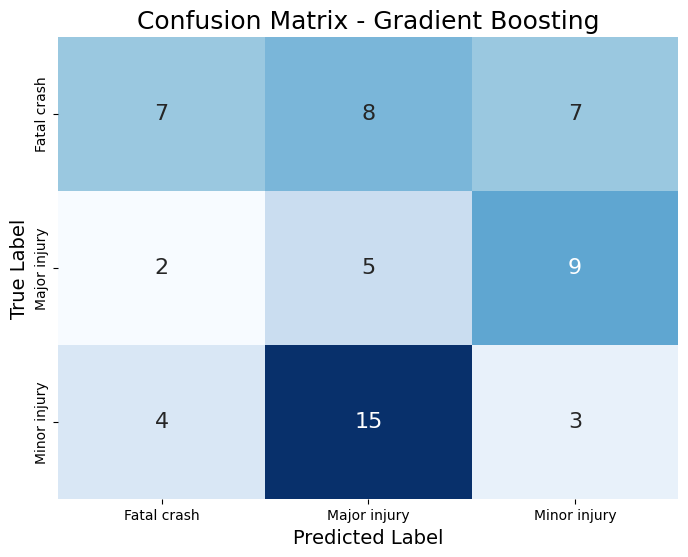

C:\Users\sneha\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:41:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Results:
Accuracy: 0.28
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.41      0.43        22
           1       0.12      0.19      0.15        16
           2       0.31      0.23      0.26        22

    accuracy                           0.28        60
   macro avg       0.30      0.27      0.28        60
weighted avg       0.31      0.28      0.29        60

Confusion Matrix:


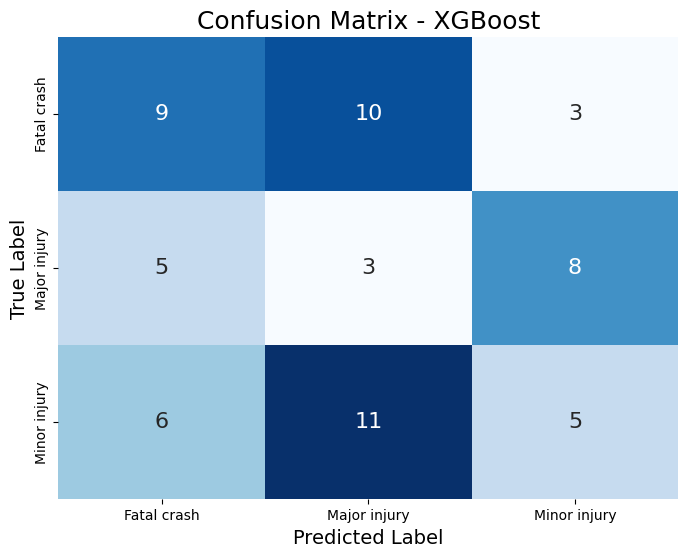


KNN Results:
Accuracy: 0.27
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.36      0.36        22
           1       0.21      0.38      0.27        16
           2       0.20      0.09      0.12        22

    accuracy                           0.27        60
   macro avg       0.26      0.28      0.25        60
weighted avg       0.26      0.27      0.25        60

Confusion Matrix:


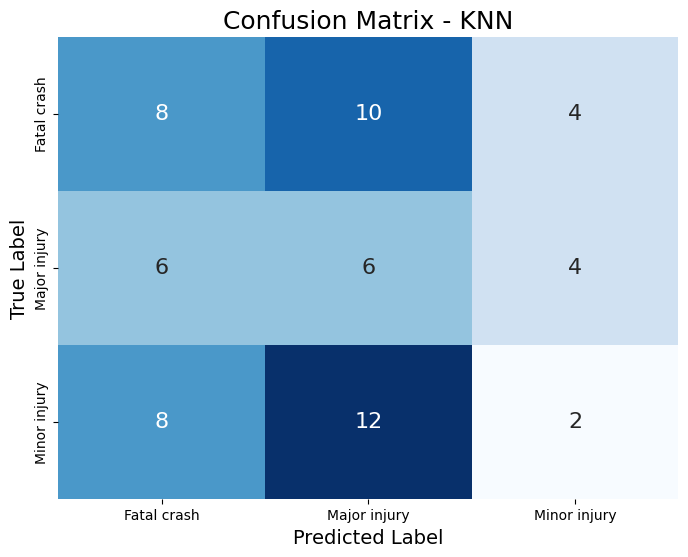


SVM Results:
Accuracy: 0.32
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.18      0.24        22
           1       0.24      0.50      0.32        16
           2       0.47      0.32      0.38        22

    accuracy                           0.32        60
   macro avg       0.36      0.33      0.31        60
weighted avg       0.37      0.32      0.31        60

Confusion Matrix:


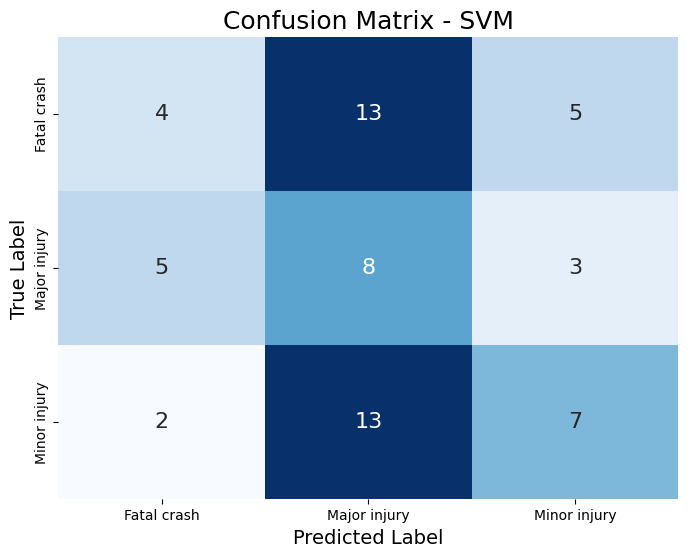


Naive Bayes Results:
Accuracy: 0.35
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.23      0.28        22
           1       0.32      0.50      0.39        16
           2       0.38      0.36      0.37        22

    accuracy                           0.35        60
   macro avg       0.35      0.36      0.35        60
weighted avg       0.36      0.35      0.34        60

Confusion Matrix:


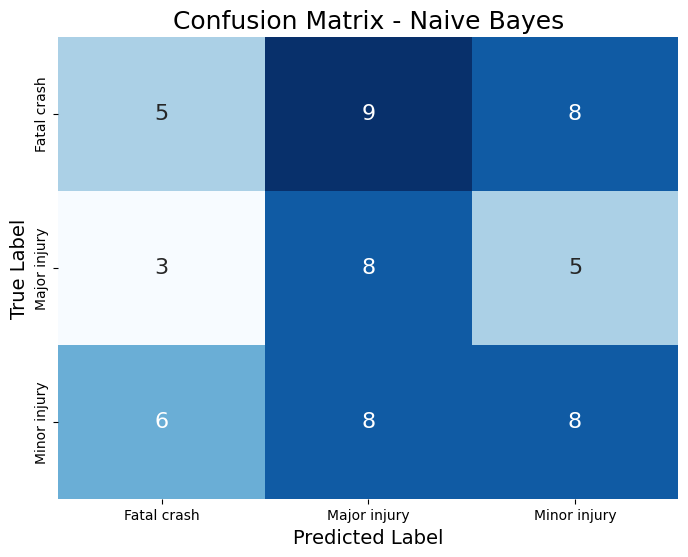


Decision Tree Results:
Accuracy: 0.27
Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.27      0.29        22
           1       0.25      0.31      0.28        16
           2       0.24      0.23      0.23        22

    accuracy                           0.27        60
   macro avg       0.27      0.27      0.27        60
weighted avg       0.27      0.27      0.27        60

Confusion Matrix:


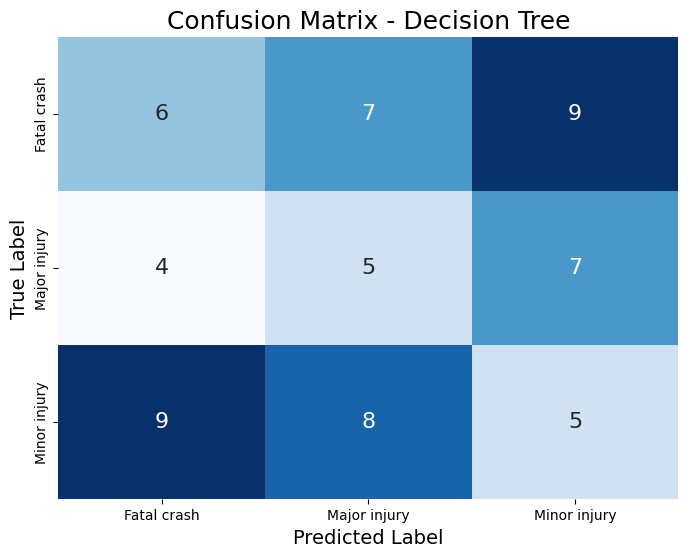

In [77]:
# Assuming df is already defined with your dataset
X = df.drop('Crash_Severity', axis=1)  # Features
y = df['Crash_Severity']  # Target

# Label Encoding for categorical target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Convert string labels to numerical labels

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Dictionary of models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Training and evaluating each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Evaluation
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)  # Calculate confusion matrix here
    
    # Plot confusion matrix using Seaborn heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, 
                yticklabels=le.classes_, cbar=False, annot_kws={"size": 16})

    # Titles and labels for clarity
    plt.title(f"Confusion Matrix - {model_name}", fontsize=18)
    plt.xlabel("Predicted Label", fontsize=14)
    plt.ylabel("True Label", fontsize=14)

    # Display plot
    plt.show()

<h1>Handling the bi-modal distribution

C:\Users\sneha\AppData\Local\Temp\ipykernel_21188\18283148.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Vehicle_Speed'])


<Axes: xlabel='Vehicle_Speed', ylabel='Density'>

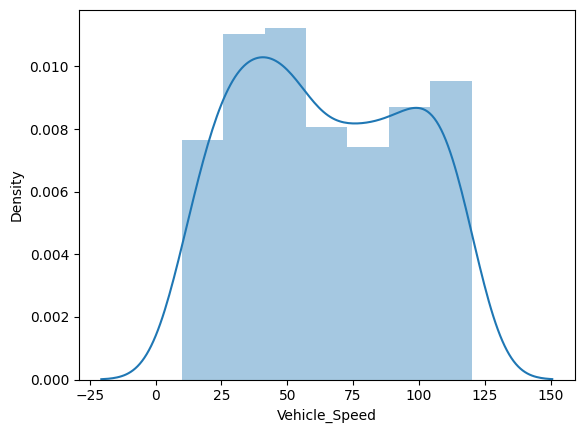

In [48]:
#Vehicle_Speed
sns.distplot(df['Vehicle_Speed'])

In [49]:
#building K-means algo to identify the two cluster points
from sklearn.cluster import KMeans
import numpy as np
n=np.array(df['Vehicle_Speed'])
n=n.reshape(-1,1)
kmeans=KMeans(n_clusters=2)
kmeans.fit(n)
#printing the cluster points
a=kmeans.cluster_centers_
print(a)
b=(a[0][0]+a[1][0])/2
print(b)

[[93.40277778]
 [37.56410256]]
65.48344017094014


C:\Users\sneha\AppData\Local\Temp\ipykernel_21188\436922289.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['Crash_Severity']=='Minor injury') & (df['Vehicle_Speed']<65.48)]['Vehicle_Speed'],hist=False)


<Axes: xlabel='Vehicle_Speed', ylabel='Density'>

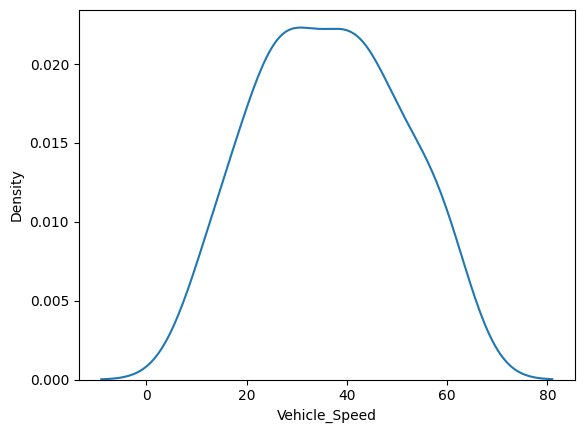

In [50]:
sns.distplot(df[(df['Crash_Severity']=='Minor injury') & (df['Vehicle_Speed']<65.48)]['Vehicle_Speed'],hist=False)


C:\Users\sneha\AppData\Local\Temp\ipykernel_21188\2884323415.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Crash_Time'])


<Axes: xlabel='Crash_Time', ylabel='Density'>

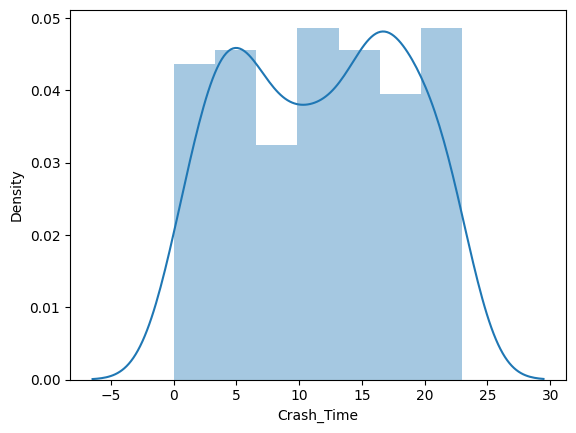

In [51]:
sns.distplot(df['Crash_Time'])

In [52]:
#building K-means algo to identify the two cluster points
from sklearn.cluster import KMeans
import numpy as np
n1=np.array(df['Crash_Time'])
n1=n1.reshape(-1,1)
kmeans=KMeans(n_clusters=2)
kmeans.fit(n1)
#printing the cluster points
a1=kmeans.cluster_centers_
print(a1)
b1=(a1[0][0]+a1[1][0])/2
print(b1)

[[ 5.62328767]
 [17.44155844]]
11.532423056395647


C:\Users\sneha\AppData\Local\Temp\ipykernel_21188\1455164551.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['Crash_Severity']=='Minor injury') & (df['Crash_Time']>10)]['Crash_Time'],hist=False)


<Axes: xlabel='Crash_Time', ylabel='Density'>

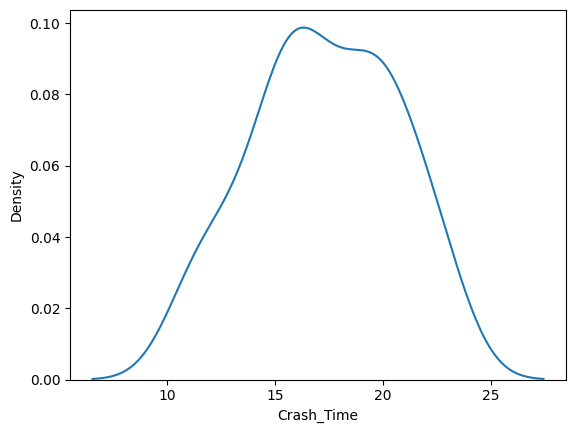

In [53]:
sns.distplot(df[(df['Crash_Severity']=='Minor injury') & (df['Crash_Time']>10)]['Crash_Time'],hist=False)

In [54]:
df.head()


,Crash_Severity,Vehicle_Speed,Crash_Time,Age,Lane_Width,Speed_Limit,Gender_Male,Vehicle_Type_Heavy Vehicle,Vehicle_Type_T.W,Number_of_Lanes_2,Number_of_Lanes_3,Road_Type_Urban,Alcohol_Consumption_Yes,Crash_Type_Rear-end,Seatbelt_Usage_Yes,Road_Surface_Condition_Icy,Road_Surface_Condition_Wet
0,Minor injury,107,11,27,3.484386,30,True,True,False,True,False,True,True,True,False,True,False
1,Minor injury,27,16,39,3.293091,110,True,False,False,True,False,False,True,True,True,False,False
2,Minor injury,87,14,42,3.218911,59,False,False,False,False,True,True,False,True,False,False,False
3,Minor injury,43,3,60,3.113012,73,False,True,False,True,False,False,False,True,False,False,True
4,Minor injury,72,8,70,3.106580,42,True,False,True,False,True,True,True,True,True,False,True


In [62]:
len(df.columns)
df.columns

Index(['Crash_Severity', 'Vehicle_Speed', 'Crash_Time', 'Age', 'Lane_Width',
       'Speed_Limit', 'Gender_Male', 'Vehicle_Type_Heavy Vehicle',
       'Vehicle_Type_T.W', 'Number_of_Lanes_2', 'Number_of_Lanes_3',
       'Road_Type_Urban', 'Alcohol_Consumption_Yes', 'Crash_Type_Rear-end',
       'Seatbelt_Usage_Yes', 'Road_Surface_Condition_Icy',
       'Road_Surface_Condition_Wet'],
      dtype='object')

C:\Users\sneha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Results:
Accuracy: 0.35
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.36      0.40        22
           1       0.24      0.38      0.29        16
           2       0.41      0.32      0.36        22

    accuracy                           0.35        60
   macro avg       0.37      0.35      0.35        60
weighted avg       0.38      0.35      0.36        60

Confusion Matrix:


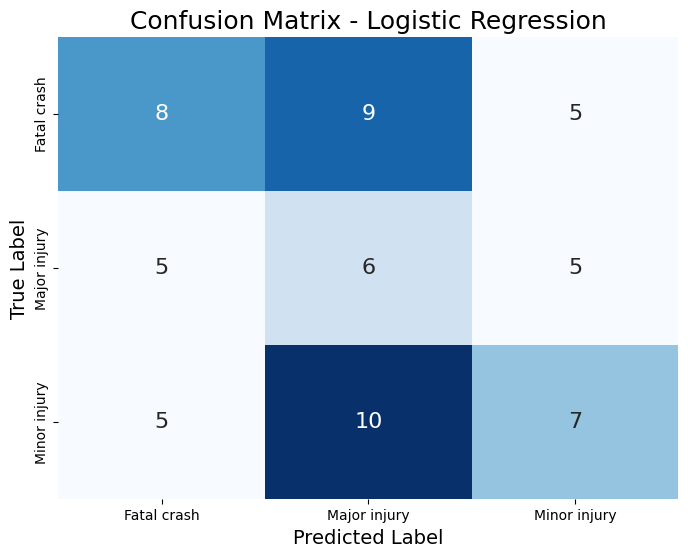


Random Forest Results:
Accuracy: 0.22
Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.32      0.34        22
           1       0.08      0.12      0.10        16
           2       0.24      0.18      0.21        22

    accuracy                           0.22        60
   macro avg       0.23      0.21      0.22        60
weighted avg       0.24      0.22      0.23        60

Confusion Matrix:


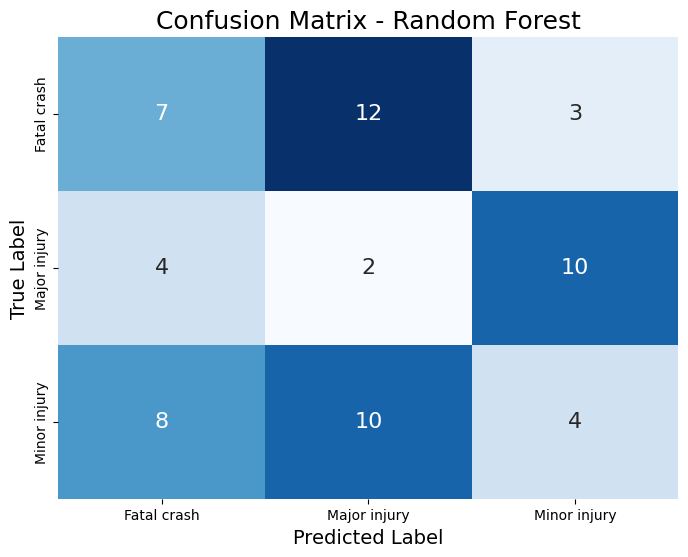


Gradient Boosting Results:
Accuracy: 0.25
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.32      0.40        22
           1       0.18      0.31      0.23        16
           2       0.16      0.14      0.15        22

    accuracy                           0.25        60
   macro avg       0.29      0.26      0.26        60
weighted avg       0.30      0.25      0.26        60

Confusion Matrix:


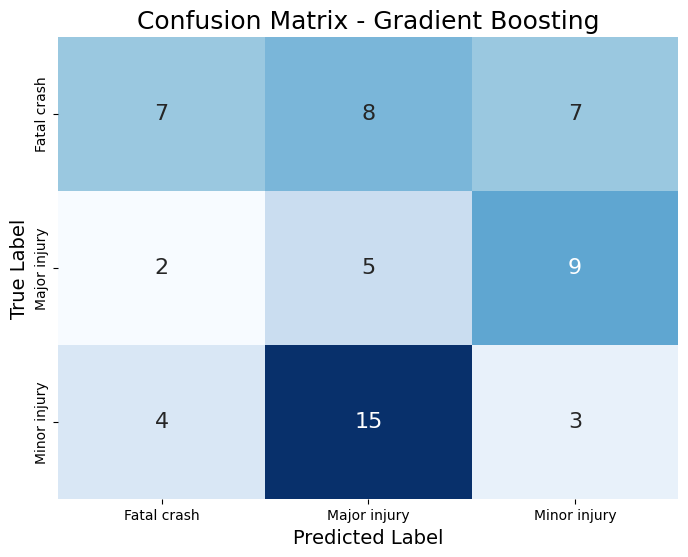

C:\Users\sneha\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:42:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Results:
Accuracy: 0.28
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.41      0.43        22
           1       0.12      0.19      0.15        16
           2       0.31      0.23      0.26        22

    accuracy                           0.28        60
   macro avg       0.30      0.27      0.28        60
weighted avg       0.31      0.28      0.29        60

Confusion Matrix:


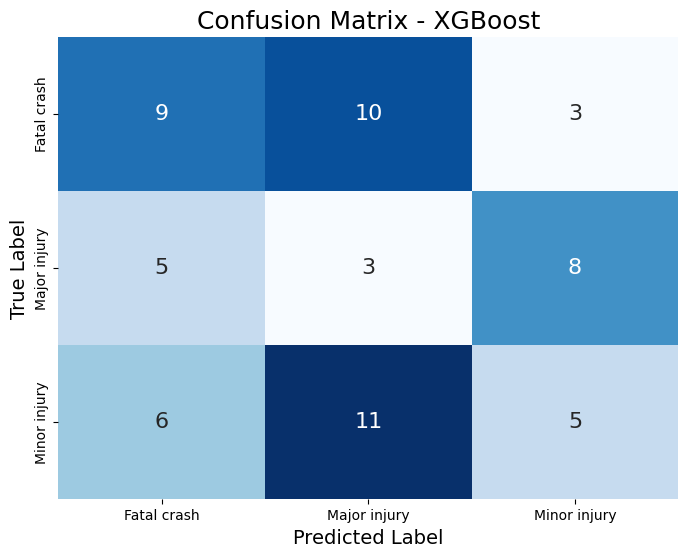


KNN Results:
Accuracy: 0.27
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.36      0.36        22
           1       0.21      0.38      0.27        16
           2       0.20      0.09      0.12        22

    accuracy                           0.27        60
   macro avg       0.26      0.28      0.25        60
weighted avg       0.26      0.27      0.25        60

Confusion Matrix:


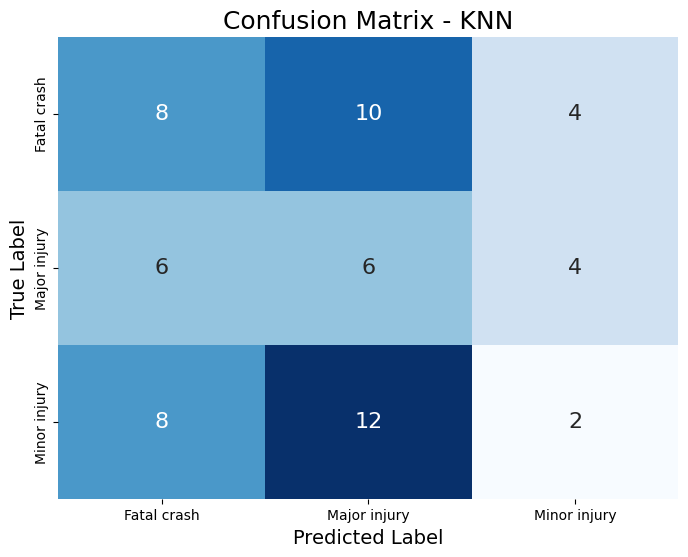


SVM Results:
Accuracy: 0.32
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.18      0.24        22
           1       0.24      0.50      0.32        16
           2       0.47      0.32      0.38        22

    accuracy                           0.32        60
   macro avg       0.36      0.33      0.31        60
weighted avg       0.37      0.32      0.31        60

Confusion Matrix:


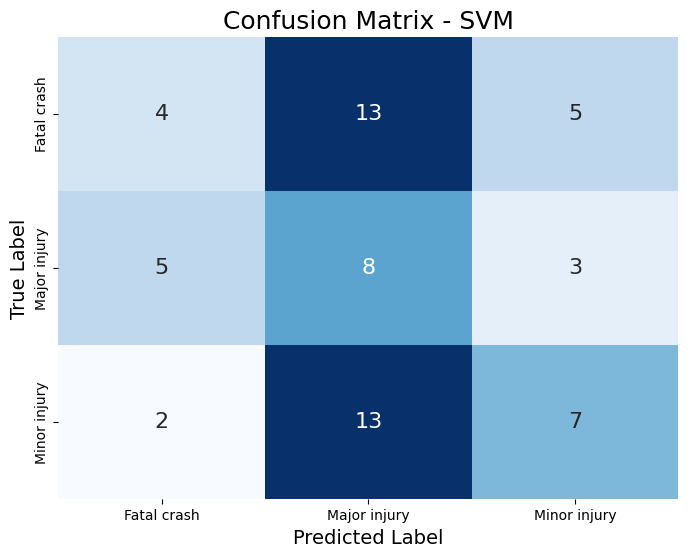


Naive Bayes Results:
Accuracy: 0.35
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.23      0.28        22
           1       0.32      0.50      0.39        16
           2       0.38      0.36      0.37        22

    accuracy                           0.35        60
   macro avg       0.35      0.36      0.35        60
weighted avg       0.36      0.35      0.34        60

Confusion Matrix:


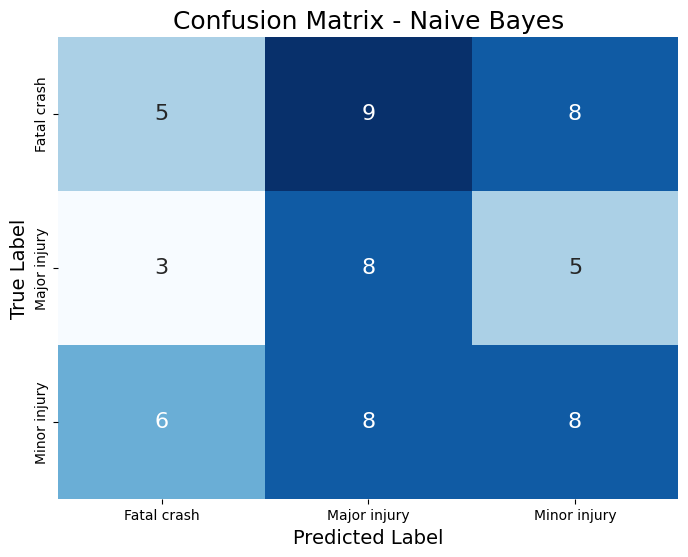


Decision Tree Results:
Accuracy: 0.27
Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.27      0.29        22
           1       0.25      0.31      0.28        16
           2       0.24      0.23      0.23        22

    accuracy                           0.27        60
   macro avg       0.27      0.27      0.27        60
weighted avg       0.27      0.27      0.27        60

Confusion Matrix:


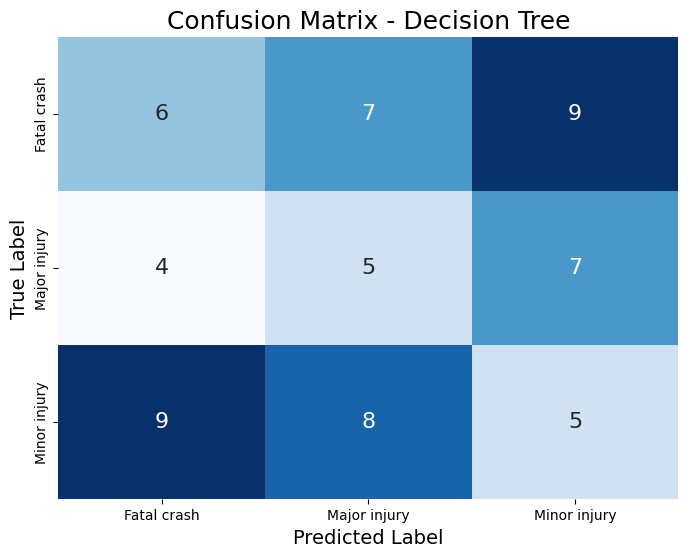

In [78]:
# Assuming df is already defined with your dataset
X = df.drop('Crash_Severity', axis=1)  # Features
y = df['Crash_Severity']  # Target

# Label Encoding for categorical target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Convert string labels to numerical labels

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Dictionary of models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Training and evaluating each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Evaluation
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)  # Calculate confusion matrix here
    
    # Plot confusion matrix using Seaborn heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, 
                yticklabels=le.classes_, cbar=False, annot_kws={"size": 16})

    # Titles and labels for clarity
    plt.title(f"Confusion Matrix - {model_name}", fontsize=18)
    plt.xlabel("Predicted Label", fontsize=14)
    plt.ylabel("True Label", fontsize=14)

    # Display plot
    plt.show()